## Observations and Insights 

What do we observe?

In [6]:
# Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame (study_results)

combined_df = pd.merge(mouse_df, study_df, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mouse


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"]!= "g989"]

In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(cleaned_df["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume 
regimen = cleaned_df.groupby("Drug Regimen")

tumor_mean = regimen["Tumor Volume (mm3)"].mean()
tumor_median = regimen["Tumor Volume (mm3)"].median()
tumor_var = regimen["Tumor Volume (mm3)"].var()
tumor_std = regimen["Tumor Volume (mm3)"].std()
tumor_sem = regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe
summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_median, "Tumor Volume Variance": tumor_var, "Tumor Volume Standard Deviation": tumor_std, "Tumor Volume SEM": tumor_sem})
summary_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:

#aggregation method, produce the same summary statistics in a single line
regimen.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_measure = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_measure

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

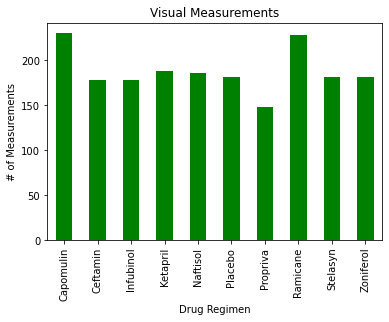

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_measure.plot.bar(color="g")

plt.title("Visual Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")

plt.show()
plt.tight_layout()


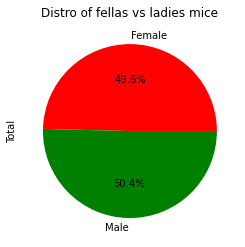

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = cleaned_df.groupby("Sex")
unique_ID = sex["Mouse ID"].nunique()
percent_sex = (unique_ID / num_mice)*100

percent_sex.plot.pie(colors = ["red", "green"],autopct= "%1.1f%%")

plt.title("Distro of fellas vs ladies mice")
plt.ylabel("Total")

plt.show()


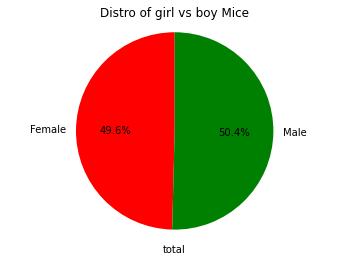

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# labels that tell what is what
labels = ["Female","Male"]

#values of setions
sizes = percent_sex

#Set colors for each section
colors = ["red", "green"]

#Create the pie plot
plt.pie(sizes, startangle=90, labels=labels, colors=colors, autopct="%1.1f%%",)

#Set equal axis
plt.axis("equal")

#Name pie plot
plt.title("Distro of girl vs boy Mice")
plt.xlabel("total")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = cleaned_df.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = cleaned_df.merge(greatest,on=["Mouse ID","Timepoint"],how="inner")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_data =[]
    
for name in regimens:
    final_vol = merge_df.loc[merge_df["Drug Regimen"]== name, "Tumor Volume (mm3)"]                  
    tumor_data.append(final_vol)
#   print(f"{name}'s final volume: {tumor_data}")   
    
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"The {name}'s potential outliers: {outliers}")
    

The Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
The Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


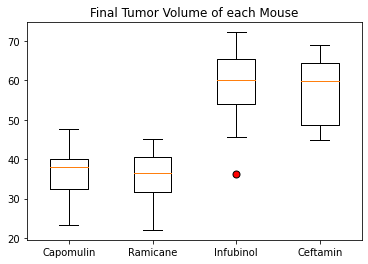

In [52]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Create plot
plt.boxplot(tumor_data,labels=regimens,flierprops={'markerfacecolor':'red','markersize':7})

# Add title and labels
plt.title ('Final Tumor Volume of each Mouse')

# Show plot
plt.show()

## Line and Scatter Plots

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509"]
line_plot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


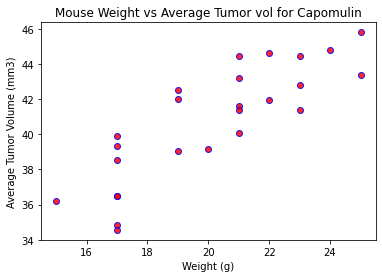

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin'] 


cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'], facecolors = "red", edgecolors ="blue", alpha = 0.85)
plt.title ('Mouse Weight vs Average Tumor vol for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume is 0.84


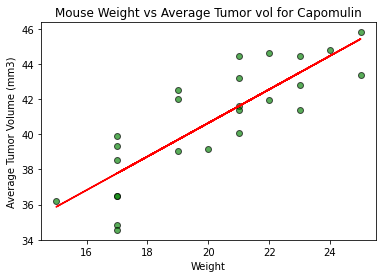

In [64]:
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values,facecolors = "green", edgecolors ="black", alpha = 0.65)
plt.plot(x_values,regress_values,"r-")
plt.title ('Mouse Weight vs Average Tumor vol for Capomulin')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()